* The dataset is in zipped format. We have to extract the dataset in the program, visualize the number of male and female babies born in a particular year, and find out popular baby names.

* This project not only focuses on implementing data manipulation and data visualization using pandas library but also tests your ability to deal with real word problem statements.

### **Dataset:**
* Popular baby names data provided by the Social Security Administration (SSA) of the United States.

***Howto download the dataset:***
* Goto https://www.ssa.gov/oact/babynames/limits.html
* Click on ‘National data’
* Get the zipped file
* use pandas, zipfile and BytesIO library to extract the data. 
* Find out a way to extract only files that consist of useful data.

In [1]:
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
import re
import matplotlib.pyplot as plt

# Open the zip file

In [2]:
# Extract Data from Zip
with ZipFile("Datasets/Baby_names.zip", 'r') as z:

    file_names = z.namelist()   # List files in the zip to find relevant ones
    # print("Files in zip:", file_names)

    # Collect dataframes for each relevant text file
    dfs = []
    for file_name in file_names:

        # --------- Only process text files -------------
        if file_name.endswith('.txt'):   
            # print(f"Processing file: {file_name}")

            # Read the text file and convert it into a DataFrame
            file_content = z.read(file_name).decode('utf-8')  # Decode bytes to string
            
            # Assume data is comma-separated; adjust if needed (e.g., '\t' for tab, or whitespace)
            df = pd.read_csv(BytesIO(file_content.encode()), sep=",", header=None)
            df.columns = ['Name', 'Gender', 'Birth_Count']  # Assign column names

            # Extract year from the filename (e.g., 'yob1880.txt' -> 1880)
            year = int(re.search(r'\d+', file_name).group()) 
            df['Year'] = year   # Add the extracted year as a new column

            dfs.append(df)

        # ------- if csv file so use -------------
        # if file_name.endswith('.csv'):
            # df = pd.read_csv(BytesIO(z.read(file_name)), encoding='utf-8', engine='python', header=None)
            # df.columns = ['Name', 'Gender', 'Birth_Count']
            # year = int(re.search(r'\d+', file_name).group())
            # df['Year'] = year
            # dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

In [3]:
data.shape, data.sample(5)

((2117219, 4),
             Name Gender  Birth_Count  Year
 1978344    Maceo      M           62  2019
 916805     Jaret      M           41  1982
 271219   Terence      M           51  1929
 491315     Karey      M           13  1952
 966928      Yoko      F           14  1985)

# Visualize Male and Female Babies for a specific Year 

In [4]:
# Filter data for a specific year (e.g., 2020)
year_data = data[data['Year'] == 2020]
year_data.shape, year_data.head()

((31550, 4),
               Name Gender  Birth_Count  Year
 1990216     Olivia      F        17677  2020
 1990217       Emma      F        15699  2020
 1990218        Ava      F        13191  2020
 1990219  Charlotte      F        13092  2020
 1990220     Sophia      F        13086  2020)

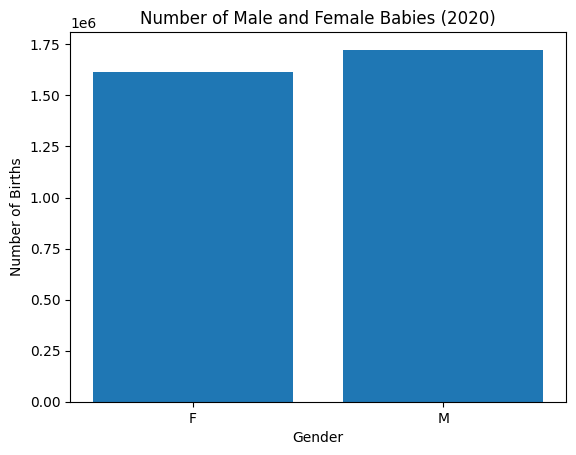

In [5]:
gender_counts = year_data.groupby('Gender')['Birth_Count'].sum()

plt.bar(gender_counts.keys().tolist(), gender_counts.tolist())
plt.title('Number of Male and Female Babies (2020)')
plt.xlabel('Gender')
plt.ylabel('Number of Births')
plt.show()

# Analyze and Sort Baby Names

In [6]:
# Top 100 names by birth count
top_100 = data.nlargest(100, 'Birth_Count')

In [7]:
# Group by names to find popular names across all years
popular_names = data.groupby('Name')['Birth_Count'].sum().nlargest(10)
print("Top 10 Most Popular Names:")
print(popular_names)

Top 10 Most Popular Names:
Name
James      5250328
John       5187975
Robert     4862085
Michael    4431942
William    4194193
Mary       4152044
David      3675136
Joseph     2665333
Richard    2583933
Charles    2435467
Name: Birth_Count, dtype: int64


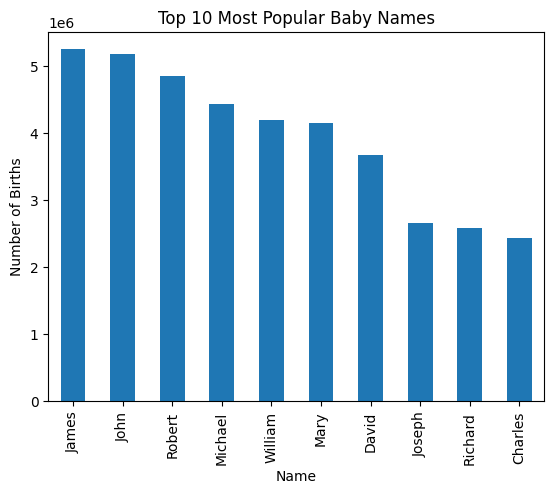

In [8]:
# Visualize top 10 names
popular_names.plot(kind='bar', title='Top 10 Most Popular Baby Names')
plt.ylabel('Number of Births')
plt.show()